# TRAVEL TRIANGLE WEBSCRAPPING PROJECT

In [2]:
import requests
url="https://traveltriangle.com/hotels/dubai-ae"

In [3]:
page=requests.get(url)

In [4]:
page

<Response [200]>

'<!doctype html><html lang="en" data-reactroot=""><head><link href="https://assets.traveltriangle.com" rel="dns-prefetch"/><link href="https://fonts.gstatic.com" rel="dns-prefetch"/><link href="https://www.googletagmanager.com" rel="dns-prefetch"/><link href="https://connect.facebook.net" rel="dns-prefetch"/><link href="https://www.google-analytics.com" rel="dns-prefetch"/><link href="//www.googleadservices.com" rel="dns-prefetch"/><link rel="preload" href="https://fonts.gstatic.com/s/lato/v13/qIIYRU-oROkIk8vfvxw6QvesZW2xOQ-xsNqO47m55DA.woff" as="font" type="font/woff2" crossorigin="anonymous"/><link rel="preload" as="script" href="https://assets.traveltriangle.com/desktop_assets/build/runtime-2711932ef77883eb6af1.js" charSet="UTF-8"/><link rel="preload" as="script" href="https://assets.traveltriangle.com/desktop_assets/build/vendor-react-c7fdf3250e6f3e0aee4a.js" charSet="UTF-8"/><link rel="preload" as="script" href="https://assets.traveltriangle.com/desktop_assets/build/vendor-chunks-
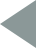
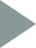
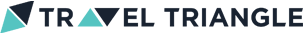

In [12]:
page.text

In [19]:
import requests
from bs4 import BeautifulSoup
import re
import numpy as np
import pandas as pd

# Lists to store the scraped data
title = []
ratings = []
expert_ratings = []
location = []
price_per_night = []
distance_from_city = []
facility = []
country = []  # Add country column

# Function to scrape hotel data from a given URL and range
def scrape_hotels(base_url, pages, country_name):
    for page_num in range(1, pages + 1):
        url = f"{base_url}?page={page_num}"
        print(f"Scraping {country_name} - Page {page_num}")
        try:
            response = requests.get(url, timeout=10)
            response.raise_for_status()
            soup = BeautifulSoup(response.content, "html.parser")
        except Exception as e:
            print(f"Failed to fetch page {page_num} from {country_name}: {e}")
            continue

        page = soup.find_all("div", class_="col-md-9 pr0")
        for p in page:
            section = p.find_all("div", class_="clearfix p8 relative wfull min-width-0")
            for i in section:
                # Title
                t = i.find('h3', class_="iblock")
                title.append(t.text.strip() if t else np.nan)

                # Ratings
                r = i.find('span', class_="block tooltipCommon relative z2")
                ratings.append(r.text.strip() if r else np.nan)

                # Expert Ratings
                expert_r = i.find("div", class_="radius2 overflowh flex alignCenter justifyCenter sbc3 pl8 pr8 css-xqrf3r")
                expert_ratings.append(expert_r.text.strip() if expert_r else np.nan)

                # Location
                l = i.find("div", class_="m0 f12")
                loc = re.findall("^\w+", l.text.strip()) if l else []
                location.append(loc[0] if loc else np.nan)

                # Price per Night
                price = i.find("p", class_="f16 fw7 m0 sfc3")
                if price:
                    price_text = price.text.strip()
                    pn = re.findall(r"\d+,\d+,?\d*", price_text)
                    price_per_night.append(pn[0] if pn else np.nan)
                else:
                    price_per_night.append(np.nan)

                # Distance from city
                dist = i.find("p", class_="f12 m0 mb4 pfc3 mt8")
                distance_from_city.append(dist.text.strip() if dist else np.nan)

                # Add country
                country.append(country_name)

        # Facilities (outside loop to match alignment)
        for p in page:
            d = p.find_all("div", class_="clearfix relative css-fu0vyd")
            for s in d:
                reg = re.findall(r"(Free Wi-Fi|Free Parking|Room Service|Air-Conditioned|Fitness Center|Outdoor Pool|Laundry Service|Restaurant)", s.text)
                facility.append(reg if reg else np.nan)

# Scrape Dubai (pages 1–18)
scrape_hotels("https://traveltriangle.com/hotels/dubai-ae", 18, "Dubai")

# Scrape Thailand (pages 1–170)
scrape_hotels("https://traveltriangle.com/hotels/thailand", 170, "Thailand")

#scrape Bali (pages 1-23)
scrape_hotels("https://traveltriangle.com/hotels/bali", 23, "Bali")

#scrape Singapore (pages 1-20)
scrape_hotels("https://traveltriangle.com/hotels/singapore", 23, "Singapore")

# Ensure all lists have the same length (facility may mismatch, fix with padding if needed)
min_length = min(len(title), len(facility))
title = title[:min_length]
ratings = ratings[:min_length]
expert_ratings = expert_ratings[:min_length]
location = location[:min_length]
price_per_night = price_per_night[:min_length]
distance_from_city = distance_from_city[:min_length]
facility = facility[:min_length]
country = country[:min_length]

# Create DataFrame
data = pd.DataFrame({
    "Title": title,
    "Rating": ratings,
    "Expert Rating": expert_ratings,
    "Location": location,
    "Price Per Night": price_per_night,
    "Distance From City": distance_from_city,
    "Facilities": facility,
    "Country": country
})

# Save to CSV
data.to_csv("hotels.csv", index=False)
print("✅ All data saved to hotels.csv")


Scraping Dubai - Page 1
Scraping Dubai - Page 2
Scraping Dubai - Page 3
Scraping Dubai - Page 4
Scraping Dubai - Page 5
Scraping Dubai - Page 6
Scraping Dubai - Page 7
Scraping Dubai - Page 8
Scraping Dubai - Page 9
Scraping Dubai - Page 10
Scraping Dubai - Page 11
Scraping Dubai - Page 12
Scraping Dubai - Page 13
Scraping Dubai - Page 14
Scraping Dubai - Page 15
Scraping Dubai - Page 16
Scraping Dubai - Page 17
Scraping Dubai - Page 18
Scraping Thailand - Page 1
Scraping Thailand - Page 2
Scraping Thailand - Page 3
Scraping Thailand - Page 4
Scraping Thailand - Page 5
Scraping Thailand - Page 6
Scraping Thailand - Page 7
Scraping Thailand - Page 8
Scraping Thailand - Page 9
Scraping Thailand - Page 10
Scraping Thailand - Page 11
Scraping Thailand - Page 12
Scraping Thailand - Page 13
Scraping Thailand - Page 14
Scraping Thailand - Page 15
Scraping Thailand - Page 16
Scraping Thailand - Page 17
Scraping Thailand - Page 18
Scraping Thailand - Page 19
Scraping Thailand - Page 20
Scraping

In [8]:
import pandas as pd
df=pd.read_csv("d:\\python batch 367\WebScrapping.ipynb\hotels.csv")
df

,Title,Rating,Expert Rating,Location,Price Per Night,Distance From City,Facilities,Country
0,Hilton Dubai Creek,5 Star Hotel,9.0,Dubai,NaN,5 km from City Center,"['Free Wi-Fi', 'Outdoor Pool', 'Air-Conditione...",Dubai
1,Royal Ascot Hotel,4 Star Hotel,8.5,Dubai,NaN,4 km from City Center,"['Free Wi-Fi', 'Laundry Service', 'Free Parking']",Dubai
2,"Marriott Hotel Al Jaddaf, Dubai",5 Star Hotel,8.0,Dubai,NaN,4 km from City Center,"['Free Wi-Fi', 'Free Parking', 'Air-Conditione...",Dubai
3,Roda Al Murooj Hotel Dubai,5 Star Hotel,9.7,Dubai,"20,000",3 km from City Center,"['Free Wi-Fi', 'Free Parking', 'Outdoor Pool',...",Dubai
4,Taj Hotel Dubai,5 Star Hotel,9.5,Dubai,"10,000",14 km from City Center,"['Outdoor Pool', 'Laundry Service', 'Room Serv...",Dubai
...,...,...,...,...,...,...,...,...
2287,Fragrance Hotel Rose,2 Star Hotel,6.9,Singapore,"4,000",3 km from City Center,"['Air-Conditioned', 'Laundry Service']",Singapore
2288,The Darlene Hotel,1 Star Hotel,6.9,Singapore,"4,000",3 km from City Center,"['Free Parking', 'Air-Conditioned', 'Laundry S...",Singapore
2289,Hawaii Hostel Singapore,2 Star Hotel,6.6,Singapore,"4,000",1 km from City Center,NaN,Singapore
2290,Golden Dragon Hotel,2 Star Hotel,6.4,Singapore,"4,000",3 km from City Center,NaN,Singapore


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2292 entries, 0 to 2291
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               2292 non-null   object 
 1   Rating              2292 non-null   object 
 2   Expert Rating       2292 non-null   float64
 3   Location            2292 non-null   object 
 4   Price Per Night     2288 non-null   object 
 5   Distance From City  2093 non-null   object 
 6   Facilities          2189 non-null   object 
 7   Country             2292 non-null   object 
dtypes: float64(1), object(7)
memory usage: 143.4+ KB


**obsevation be can observe that only expert ratings is float else all is object datatype we need to change the datatype of price per night ,distance from city**

In [3]:
# as per data 4 countries has following no of hotels
df['Country'].value_counts()

Country
Thailand     1695
Bali          226
Singapore     194
Dubai         177
Name: count, dtype: int64

In [26]:
#check for null values 
df.isna().sum()

Title                   0
Rating                  0
Expert Rating           0
Location                0
Price Per Night         4
Distance From City    199
Facilities            103
Country                 0
dtype: int64

**observation:
    distance from city and facility has null values**

In [9]:
#drop na for distance from city and facility 
#this will drop the row containg nan values
df.dropna(inplace=True)

In [10]:
#again check if null values are present or not
df.isna().sum()

Title                 0
Rating                0
Expert Rating         0
Location              0
Price Per Night       0
Distance From City    0
Facilities            0
Country               0
dtype: int64

**observation:
    we have successfully removed the missing values from the dataset and made inplace=true which will reflect in original dataset**

In [11]:
#rename column 'distance from city'  to 'distance from city(in km)'
df.rename(columns={'Distance From City':'Distance From City (in km)'},inplace=True)

In [59]:
# distnace was in form of num +string i have extracted only the number as i don't want '3 km from city'
# as in column

In [12]:
df['Distance From City (in km)']=df['Distance From City (in km)'].str.extract(r'(\d+)')

In [13]:
df

,Title,Rating,Expert Rating,Location,Price Per Night,Distance From City (in km),Facilities,Country
3,Roda Al Murooj Hotel Dubai,5 Star Hotel,9.7,Dubai,"20,000",3,"['Free Wi-Fi', 'Free Parking', 'Outdoor Pool',...",Dubai
4,Taj Hotel Dubai,5 Star Hotel,9.5,Dubai,"10,000",14,"['Outdoor Pool', 'Laundry Service', 'Room Serv...",Dubai
5,Holiday Inn Downtown Dubai,4 Star Hotel,9.5,Dubai,"5,000",6,"['Free Parking', 'Free Wi-Fi', 'Fitness Center']",Dubai
6,The Oberoi Hotel Dubai,5 Star Hotel,9.5,Dubai,"5,000",5,"['Free Parking', 'Laundry Service', 'Room Serv...",Dubai
7,The Ritz Carlton Hotel Dubai,5 Star Hotel,9.5,Dubai,"20,000",3,"['Fitness Center', 'Free Wi-Fi']",Dubai
...,...,...,...,...,...,...,...,...
2285,Yotel Hotel Singapore,4 Star Hotel,7.0,Singapore,"12,000",4,"['Free Wi-Fi', 'Free Parking', 'Outdoor Pool',...",Singapore
2286,Diamond Hotel,2 Star Hotel,6.9,Singapore,"4,000",3,"['Free Parking', 'Laundry Service', 'Air-Condi...",Singapore
2287,Fragrance Hotel Rose,2 Star Hotel,6.9,Singapore,"4,000",3,"['Air-Conditioned', 'Laundry Service']",Singapore
2288,The Darlene Hotel,1 Star Hotel,6.9,Singapore,"4,000",3,"['Free Parking', 'Air-Conditioned', 'Laundry S...",Singapore


In [14]:
# price per night has the datatype as object convert it to float 
# distance from city has the datatype as object convert it to float
df['Price Per Night'] = df['Price Per Night'].str.replace(',', '').astype('int64')
df['Distance From City (in km)']=df['Distance From City (in km)'].astype('int64')

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1995 entries, 3 to 2291
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Title                       1995 non-null   object 
 1   Rating                      1995 non-null   object 
 2   Expert Rating               1995 non-null   float64
 3   Location                    1995 non-null   object 
 4   Price Per Night             1995 non-null   int64  
 5   Distance From City (in km)  1995 non-null   int64  
 6   Facilities                  1995 non-null   object 
 7   Country                     1995 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 140.3+ KB


**observation:now the datatype are converted from bject to int64**

In [19]:
#the facilities are in form of list i have converted it to comma separated values
# df['Facilities'].str.extract(r"'([^']+)'")
df['Facilities']=df['Facilities'].apply(lambda x: re.sub(r"[\'\"\[\]]","", x))

In [20]:
df

,Title,Rating,Expert Rating,Location,Price Per Night,Distance From City (in km),Facilities,Country
3,Roda Al Murooj Hotel Dubai,5 Star Hotel,9.7,Dubai,20000,3,"Free Wi-Fi, Free Parking, Outdoor Pool, Air-Co...",Dubai
4,Taj Hotel Dubai,5 Star Hotel,9.5,Dubai,10000,14,"Outdoor Pool, Laundry Service, Room Service",Dubai
5,Holiday Inn Downtown Dubai,4 Star Hotel,9.5,Dubai,5000,6,"Free Parking, Free Wi-Fi, Fitness Center",Dubai
6,The Oberoi Hotel Dubai,5 Star Hotel,9.5,Dubai,5000,5,"Free Parking, Laundry Service, Room Service, R...",Dubai
7,The Ritz Carlton Hotel Dubai,5 Star Hotel,9.5,Dubai,20000,3,"Fitness Center, Free Wi-Fi",Dubai
...,...,...,...,...,...,...,...,...
2285,Yotel Hotel Singapore,4 Star Hotel,7.0,Singapore,12000,4,"Free Wi-Fi, Free Parking, Outdoor Pool, Air-Co...",Singapore
2286,Diamond Hotel,2 Star Hotel,6.9,Singapore,4000,3,"Free Parking, Laundry Service, Air-Conditioned",Singapore
2287,Fragrance Hotel Rose,2 Star Hotel,6.9,Singapore,4000,3,"Air-Conditioned, Laundry Service",Singapore
2288,The Darlene Hotel,1 Star Hotel,6.9,Singapore,4000,3,"Free Parking, Air-Conditioned, Laundry Service",Singapore


**obesrvation:i have cleaned the dta by removing facilities square brackets and quotes and the data is ready to perform visualization**

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1995 entries, 3 to 2291
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Title                       1995 non-null   object 
 1   Rating                      1995 non-null   object 
 2   Expert Rating               1995 non-null   float64
 3   Location                    1995 non-null   object 
 4   Price Per Night             1995 non-null   int64  
 5   Distance From City (in km)  1995 non-null   int64  
 6   Facilities                  1995 non-null   object 
 7   Country                     1995 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 140.3+ KB


In [22]:
# no null values found

In [24]:
df.describe()   #this will print the count min,max etc of numerical values only

,Expert Rating,Price Per Night,Distance From City (in km)
count,1995.000000,1995.000000,1995.000000
mean,8.018847,5002.756892,90.831078
std,0.738092,3551.578317,1025.421930
min,0.000000,1000.000000,1.000000
25%,7.500000,2500.000000,2.000000
50%,8.000000,2500.000000,4.000000
75%,8.500000,7500.000000,8.000000
max,10.000000,20000.000000,15400.000000


In [25]:
#save the clean dataset into csv file for furthur use and visualisation
df.to_csv("clean_data_hotels.csv",index=False)